# Names

- Jacob Takesuye
- Daniel Zhu
- Emily Huang
- Roland Noy

# Research Question

Are we able to accurately model and predict flight costs within the US based on the origin of the flight, final destination, popularity of the city, distance, and quarter of the year?

## Background and Prior Work

After wrapping up our summer travels, we can’t help but reflect on how we could’ve saved our money. Thus, flight fare prediction becomes a key focus for travelers given the unpredictability of airline ticket prices. Despite tools like Google Flights that track past trends, knowing the optimal time to book remains challenging. We understand that there could be endless factors that can affect flight costs, however, we believe key factors—the origin and destination airports, route distance, and the season (quarter of the year)—are among the primary drivers of ticket prices. By analyzing these variables with a data-driven understanding of fare determinants, this project seeks to identify predictive trends and develop a model to support informed booking decisions.

Prior research provides insight into fare determinants and a strong foundation for our research. A project by Arnab Chaki demonstrated that machine learning can achieve high predictive accuracy (R² of 0.96) by using factors such as origin/destination and route characteristics, emphasizing location-based variables as highly effective for fare prediction<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). This suggests that machine learning models when structured with the right data, can explain much of the variation in ticket prices. This will give us support in our ability to create an even more precise model by including more factors that affect flight prices.

Additional research from the University of Southern California explores the dynamic algorithms airlines use to adjust fares based on real-time data like seat availability, seasonal trends, and route popularity<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). This analysis shows that peak travel periods and high-demand routes drive up prices, emphasizing timing and route selection as critical elements. While airlines use these models to maximize revenue, predictive models could also help consumers like us optimize booking decisions by taking advantage of these same patterns.
Though we were unable to find a research article that uses all the same factors as us, there is a research article that answers our hypothesis but examines a more limited set of factors. 

Krishna Rama-Murthy’s thesis on U.S. airline fare modeling highlights how factors like market concentration, competition, and low-cost carriers significantly influence ticket prices<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). His analysis shows that increased competition, especially at destination airports, reduces fares, while low-cost carrier airports exert a general downward pressure on prices. These findings support our project’s aim to integrate both competition—demand and supply factors such as passenger flows, market concentration, and carrier type—into a comprehensive fare prediction model, enabling travelers to make more informed booking decisions.

While previous studies have shown that machine learning and location-based features can predict fares effectively, they often focus on limited factors—such as location, distance, or timing alone. These isolated analyses lack the integration of multiple influencing factors, which may yield more holistic and precise fare predictions. Our project seeks to address this gap by building a model incorporating multiple variables—origin, destination, route distance, and seasonality—providing a more comprehensive understanding of fare dynamics. By doing so, we aim to develop a predictive tool that enables travelers to better anticipate fare trends, supporting budget-friendly travel decisions.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) RANDOMARNAB. (2022). Flight Fare Prediction - 0.96 R2 score. *Kaggle*. https://www.kaggle.com/code/arnabchaki/flight-fare-prediction-0-96-r2-score/notebook 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Shepard K. (2019, July 1). The Algorithm behind Plane Ticket Prices and How to Get the Best Deal. *Illumin Magazine*. https://illumin.usc.edu/the-algorithm-behind-plane-ticket-prices-and-how-to-get-the-best-deal/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Rama-Murthy K. (2006, June 23). Modeling of United States Airline Fares -- Using the Official Airline Guide (OAG) and Airline Origin and Destination Survey (DB1B). *VTechWorks Repository*. https://vtechworks.lib.vt.edu/items/4e2ade14-39a1-4c25-9eea-c152f3006674 

# Hypothesis


Given the information on US Airline Flight Routes and Fares between 1993 to 2024, we hypothesize that statistical tests and a machine learning model will show that destination, origin, distance, and fiscal quarters play a significant role in the price of a flight. We predict this outcome due to our own personal experiences in booking flights before, observing that these features tend to play a big role in the cost of a flight. We expect to see that popular destinations, greater travel distances, and common vacation periods will drive up the costs as those are the key trends we’ll see in the market.

We will be measuring our variables as follows:

- Popular Destinations: We will quantify this by assessing the amount of people that travel to each city, assuming higher volumes correspond to greater popularity. 

- Travel Distance: The total number of miles traveled between the airports of departure and arrival to provide a consistent metric for distance-based cost variations

- Quarter: The fiscal quarter in which the flights were flown which will capture the demand of peak and off-peak seasons.

If successful, the model will allow for more accurate and data-driven flight cost predictions. Such a model could provide valuable insights for airlines in optimizing their pricing strategies and consumers could better anticipate future flight costs.


# Data

## Data overview

- Dataset #1
  - Dataset Name: US Airline Flight Routes and Fares 1993-2024
  - Link to the dataset: https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024/data
  - Number of observations: 245,955
  - Number of variables: 23

Our dataset holds various flight data from 1993-2024 such as:
- Fare (float64): price of a flight's ticket
- Airports (String): departure and arrival airport codes
- Passengers (int64): number of passengers for each flight
- Miles (int64): number of miles flown between airports

Our primary variables we’ll be analyzing are the year, fiscal quarter, departure and arrival airports, number of miles flown, and the fare. We will clean our dataset by standardizing column names and making them accurately descriptive, as well as changing the quarter column to be clearer (i.e. 1 - > Q1). We will also need to check for any missing data and potentially deal with that.

## US Airline Flight Routes and Fares 1993-2024

In [1]:
import pandas as pd

# load dataset
flights = pd.read_csv( 'flight_data.csv', low_memory=False )

# Collect columns we need and give them succinct names
flights = flights[ ['fare','Year', 'quarter', 'city1', 'city2', 'airport_1', 'airport_2', 'nsmiles', 'passengers']]
column_names = ['Fare', 'Year', 'Quarter', 'Departure City', 'Arrival City', 'Departure Airport', 'Arrival Airport', 'Miles', 'Passengers']
flights.columns = column_names

# Drop null rows if there are any
flights = flights.dropna()

# Make Quarter column data clearer
quarter_values = { 1: 'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}
flights['Quarter'] = flights['Quarter'].map(quarter_values)

# View cleaned up data
flights.head()

/var/folders/wz/1p5_3j3x6qggt4g7qr_qgqb80000gn/T/ipykernel_84014/506407709.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Fare,Year,Quarter,Departure City,Arrival City,Departure Airport,Arrival Airport,Miles,Passengers
0,81.43,2021,Q3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180
1,208.93,2021,Q3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19
2,184.56,2021,Q3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204
3,182.64,2021,Q3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264
4,177.11,2021,Q3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398


In [2]:
# Group by Arrival City and sum together Passengers to assign popularity rank
passengers = flights[['Arrival City', 'Passengers']].groupby('Arrival City').sum()
passengers = passengers.sort_values(by = 'Passengers', ascending = False).reset_index()
passengers['Popularity'] = passengers.index + 1

In [3]:
# Assign popularity rank based the amount of people who visited each city
popularity = passengers[['Arrival City', 'Popularity']] # 1 being the most visited and 128 being the least

In [4]:
# Add the popularity column to the original dataset
flights = flights.merge(popularity, on = 'Arrival City')

# View first 5 rows now
flights.head()

,Fare,Year,Quarter,Departure City,Arrival City,Departure Airport,Arrival Airport,Miles,Passengers,Popularity
0,81.43,2021,Q3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,5
1,208.93,2021,Q3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,5
2,184.56,2021,Q3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,11
3,182.64,2021,Q3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,11
4,177.11,2021,Q3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,7


In [5]:
flights.dtypes

Fare                 float64
Year                   int64
Quarter               object
Departure City        object
Arrival City          object
Departure Airport     object
Arrival Airport       object
Miles                  int64
Passengers             int64
Popularity             int64
dtype: object

In [6]:
filtered_flights = flights.groupby( ['Departure City', 'Arrival City']).filter( lambda x: len(x) >= 150 )

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return only the rows where the value in the column is within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
# Apply the remove_outliers function to the relevant columns
filtered_flights = remove_outliers(filtered_flights, 'Passengers')
filtered_flights = remove_outliers(filtered_flights, 'Miles')
filtered_flights = remove_outliers(filtered_flights, 'Fare')

In [9]:
filtered_flights = filtered_flights[filtered_flights['Passengers'] >= 20]

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Filtering our data

First things first, we should get a sense of what's in our data. Since we can broadly group each of our flights into either (departure city, arrival city) pairs or solely by popularity (arrival city), we need to determine whether we should drop any group that has too little data. After all, if we're trying to create a model, a category with 10 samples in it will highly overfit as opposed to  one with 10,000.

Let's start with what would be most convenient for our model, detailed pairs of departure city and arrival city!

In [9]:
# Group departure and arrival cities
dept_arr = flights.groupby(['Departure City', 'Arrival City']).size()
dept_arr_pairs = len(dept_arr)
dept_arr_pairs

1266

Since there's around 1200 ordered pairs, let's take the average of how many flights per pair there could be!

In [10]:
# Find mean flights per dept/arr. city pair
flights_per_pair = flights.shape[0] /  dept_arr_pairs
print( "There are an average of " + str(flights_per_pair) + " per pair.")

There are an average of 194.2772511848341 per pair.


If our data was evenly distributed, it looks like each pair of cities would have almost 200 flights logged. However, we know that this may likely not be the case. Some destinations are more popular, and some departures have less outgoing flights than others. Let's take a look for ourselves.

In [11]:
flight_distribution = flights.groupby(['Departure City', 'Arrival City']).size().reset_index(
    name = 'Counts').sort_values( by='Counts', ascending=False)
flight_distribution

,Departure City,Arrival City,Counts
911,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",3221
1087,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2102
1102,"New York City, NY (Metropolitan Area)","Washington, DC (Metropolitan Area)",1991
944,"Los Angeles, CA (Metropolitan Area)","Washington, DC (Metropolitan Area)",1818
163,"Boston, MA (Metropolitan Area)","Los Angeles, CA (Metropolitan Area)",1705
...,...,...,...
1144,"Orlando, FL","Sioux Falls, SD",1
1147,"Orlando, FL","Toledo, OH",1
1148,"Orlando, FL","Tulsa, OK",1
1151,"Palm Springs, CA","Seattle, WA",1


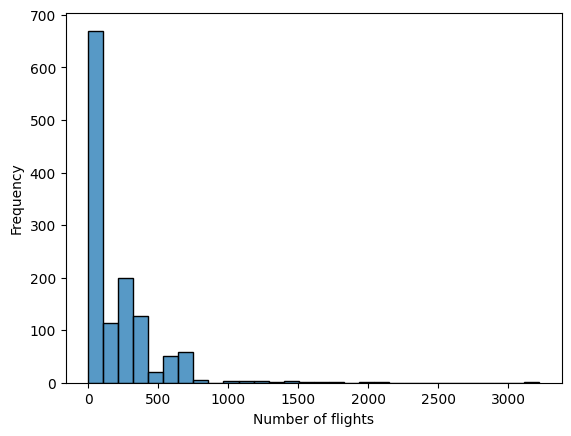

In [12]:
sns.histplot(data=flight_distribution, x='Counts', bins=30)
plt.ylabel('Frequency')
plt.xlabel('Number of flights');

As we expect, major hubs have many more flights going to and from them, while there are even some pairs that only have 1 flight recorded! What's important to note is that over half of our pairs fall into a bin that has around 100 or less observations. This could introduce a lot of noise into our predictions later on. Because of this, we will filter out those pairs that have less than 150 flights.

In [13]:
# Keep only the rows where the pair has over 150 flights
filtered_flights = flights.groupby( ['Departure City', 'Arrival City']).filter( lambda x: len(x) >= 150 )
print("There are " + str(filtered_flights.shape[0]) + " rows.")
print("There are " + str(len(filtered_flights.groupby( ['Departure City', 'Arrival City']).size())) + " pairs of cities.")

There are 224521 rows.
There are 548 pairs of cities.


After this filtering, although we removed over half of our pairs, it only brought our dataset down by about 10%. This leaves us with a lot to work with.

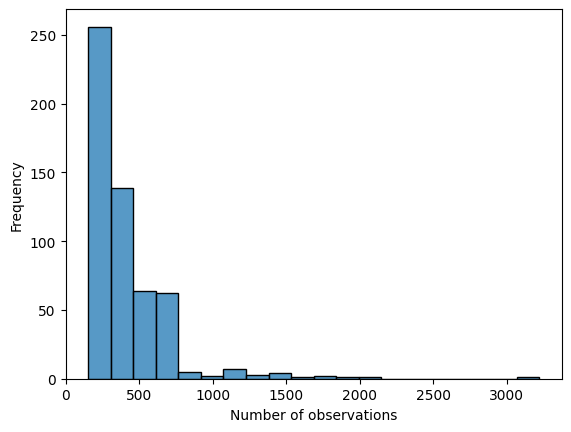

In [14]:
filtered_flights_counts = filtered_flights.groupby(['Departure City', 'Arrival City']).size().reset_index(name = 'Counts')
sns.histplot(data=filtered_flights_counts, x='Counts', bins=20)
plt.ylabel('Frequency')
plt.xlabel('Number of observations');

Although there are some outliers as we mentioned before, now we have a dataset that we can work with without worrying about overfitting due to low sampling. Later on, however, we may see better predictions for these cities with higher volume of flights.

### Section 1 of EDA

Exploratory analysis stuff. Graphs between variables, some .describe() or pairplots. take a look at the eda lecture notebook, the kaggle source we cited, or past discussion/assignment notebooks to get an idea

**Distribution of Fare Prices**

Text(0, 0.5, 'Frequency')

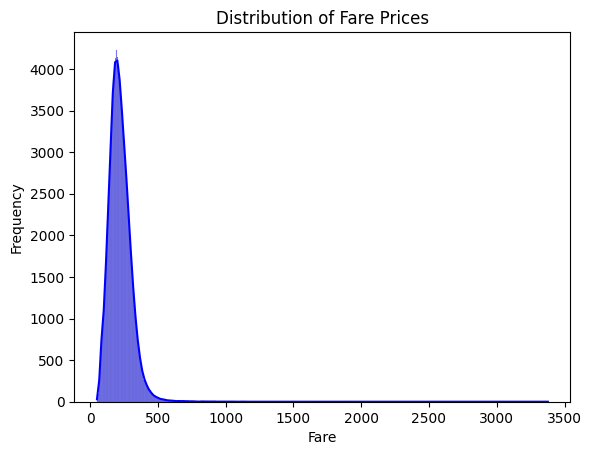

In [15]:
# Distribution of Fare Prices
sns.histplot(filtered_flights['Fare'], kde = True, color = 'blue')
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')

This histogram graph shows the distribution of fares across flights.
This graph shows that a majority of fares are below $500. This code uses the Seaborn library to generate a histogram illustrating the distribution of fare prices from the filtered_flights dataset. The histogram is plotted in blue, with the x-axis representing fare values and the y-axis showing their frequency. The plot reveals that most fares are concentrated below 500 units, with a steep decline in frequency beyond this range, indicating a right-skewed distribution. The KDE curve further highlights the peak around lower fare values, suggesting that higher fares are relatively rare.

**Scatterplot of Fares Over the Years**

Text(0, 0.5, 'Fare')

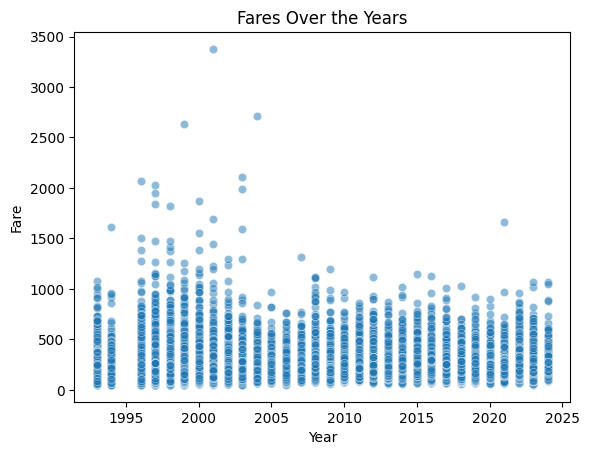

In [21]:
#This scatterplot shows the fares over the years
sns.scatterplot(data = filtered_flights, x = 'Year', y = 'Fare', alpha = 0.5)
plt.title("Fares Over the Years")
plt.xlabel("Year")
plt.ylabel("Fare")

The provided code snippet uses the Seaborn library to create a scatterplot that visualizes the distribution of fares over time. The sns.scatterplot function takes a dataset named filtered_flights and plots the 'Year' on the x-axis and 'Fare' on the y-axis, with a transparency (alpha) set to 0.5 to reduce overplotting. The plot shows that fare values are scattered across different years from approximately 1995 to 2025. Most fares appear to be concentrated below 1000 units, with a few outliers reaching up to 3500.

**Number of Flights by Origin & Arrival City (Descending Order)**

/var/folders/p_/sqskmmrj4pv9626jrr0_59_r0000gp/T/ipykernel_5930/3306469669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_flights, x='Departure City', order=origin_counts.index, palette='plasma');


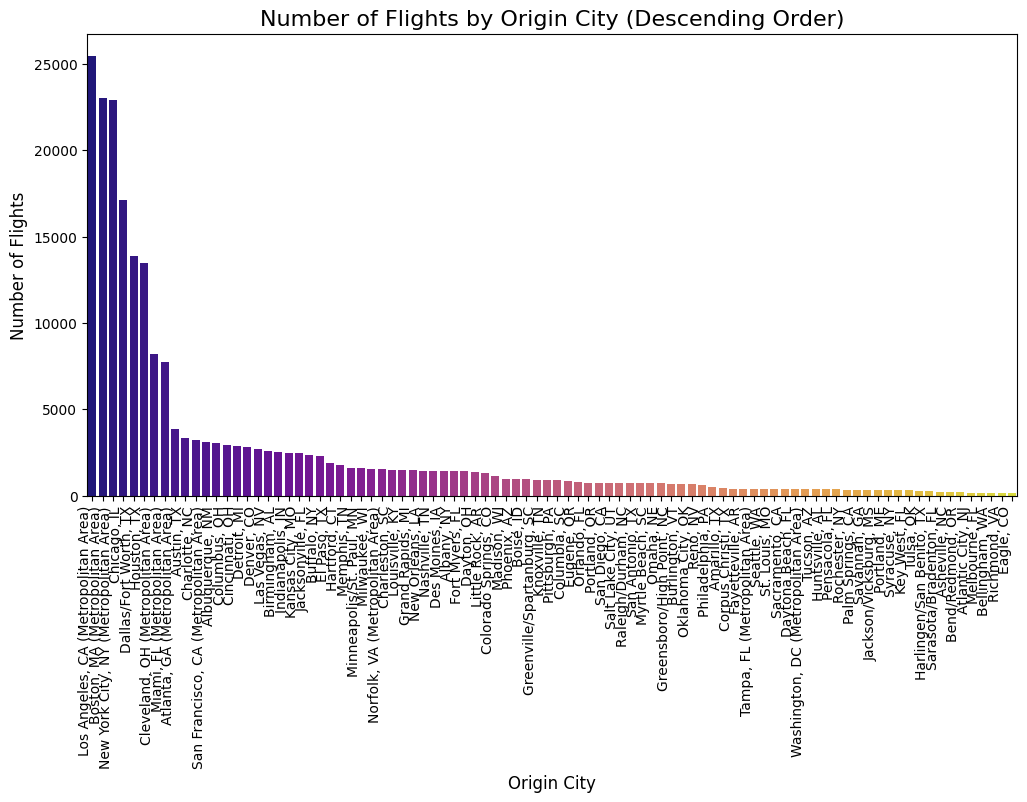

/var/folders/p_/sqskmmrj4pv9626jrr0_59_r0000gp/T/ipykernel_5930/3306469669.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_flights, x='Arrival City', order=arrival_counts.index, palette='magma');


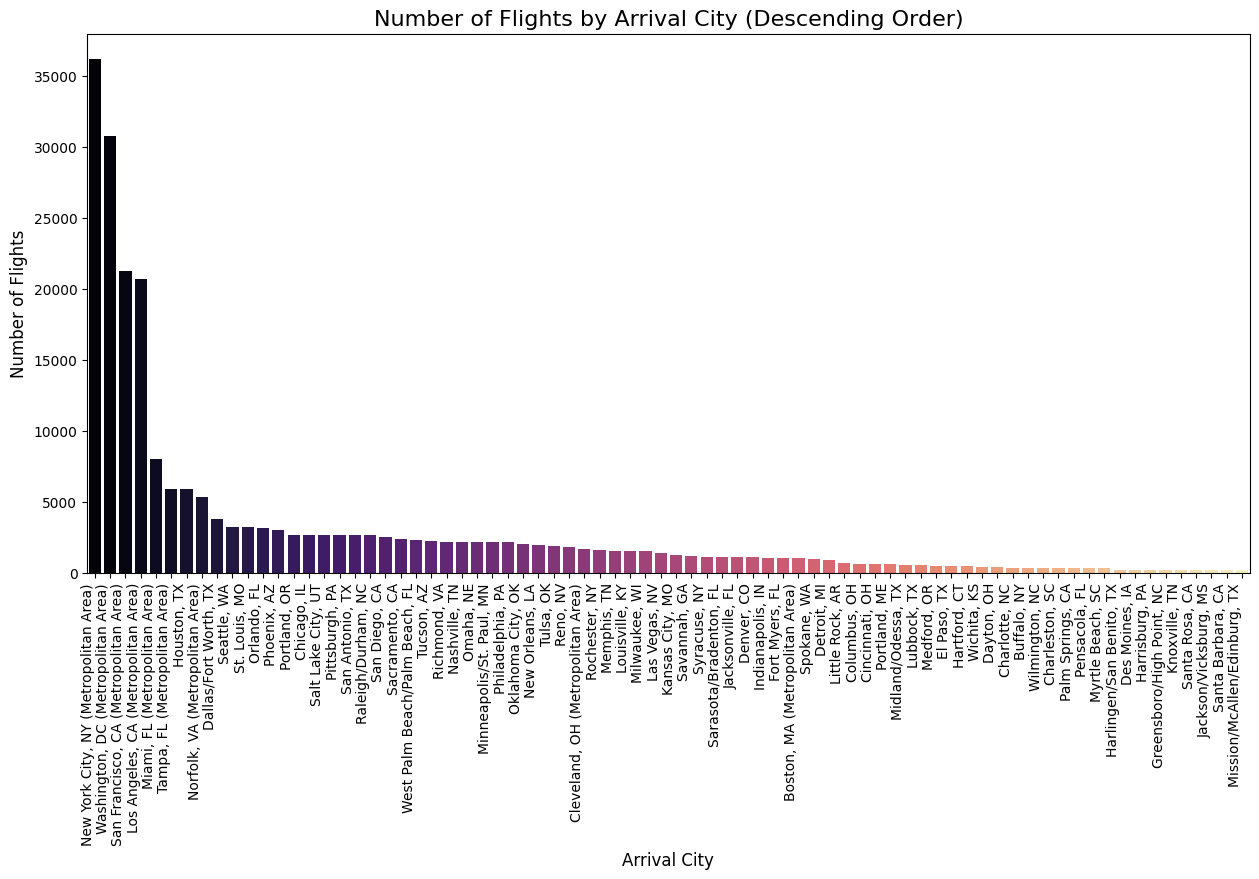

In [27]:
# Number of Flights by Origin City (Descending Order)

origin_counts = filtered_flights['Departure City'].value_counts() # Count of flights by Origin

# Count plot, using the sorted order of origin cities
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_flights, x='Departure City', order=origin_counts.index, palette='plasma');

plt.title("Number of Flights by Origin City (Descending Order)", fontsize=16)
plt.xlabel("Origin City", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.show() 

# Number of Flights by Arrival City (Descending Order)

arrival_counts = filtered_flights['Arrival City'].value_counts() # Count of flights by arrival city

# Count plot, using the sorted order of arrival cities
plt.figure(figsize=(15, 7))
sns.countplot(data=filtered_flights, x='Arrival City', order=arrival_counts.index, palette='magma');

plt.title("Number of Flights by Arrival City (Descending Order)", fontsize=16)
plt.xlabel("Arrival City", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.show() 

The provided code generates a bar chart visualizing the number of flights departing and arriving from various cities, sorted in descending order. It uses the value_counts method to calculate the flight counts for each city and the countplot function from Seaborn to create the plot. The x-axis lists cities and the y-axis displays the number of flights. By origin chart highlights that cities like Los Angeles, Boston, New York, and Chicago have significantly higher flight volumes compared to other cities, showcasing a sharp decline as we move toward cities with fewer flights. By destination/arrival chart highlights that cities like New York, Washington, and San Francisco have significantly higher flight volumes compared to other cities, showcasing a sharp decline as we move toward cities with fewer flights. This becomes relevant as we can see the more popular origin and destination cities. However, to make these graphs more relevant we would like to extract the number of passengers from these number of flights as our next step.

**Total Passengers by Year and Quarter**

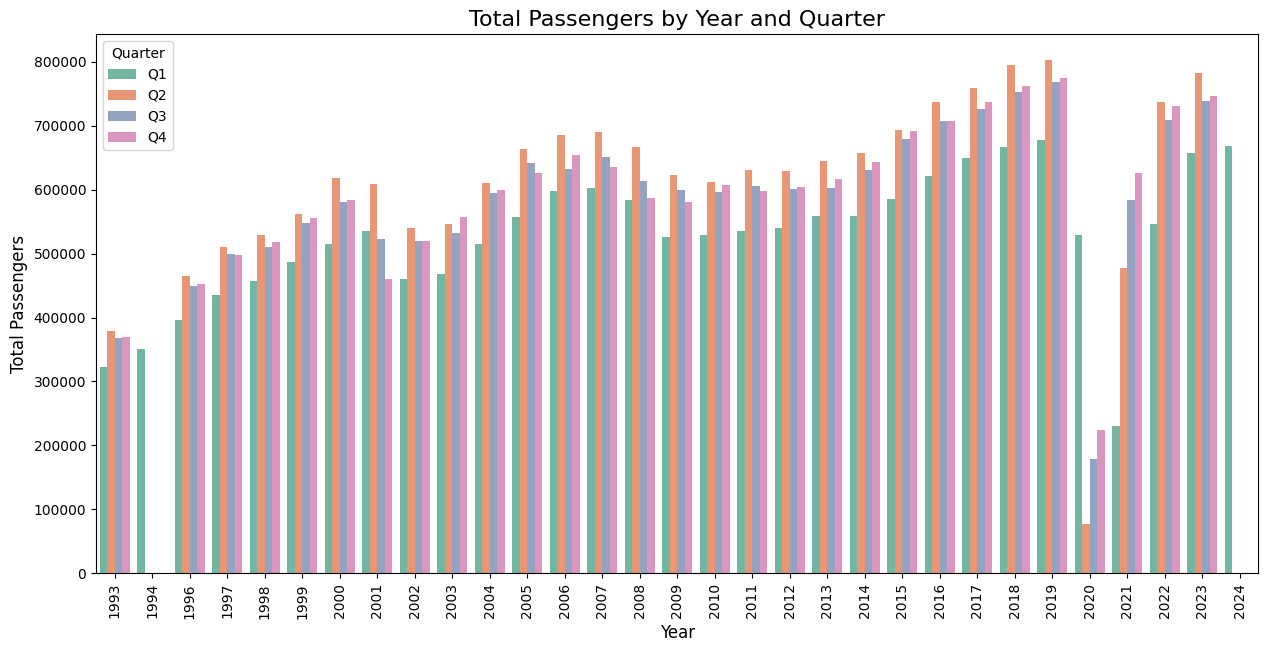

In [17]:
# Group the data Year and Quarter, summing Passengers
passengers_by_year_quarter = filtered_flights.groupby(['Year', 'Quarter'], as_index=False)['Passengers'].sum()

plt.figure(figsize=(15, 7))
sns.barplot(data=passengers_by_year_quarter, x='Year', y='Passengers', hue='Quarter', palette='Set2')

plt.title("Total Passengers by Year and Quarter", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Quarter")

The provided code generates a grouped bar chart that visualizes the total number of passengers per year, further categorized by quarters (Q1, Q2, Q3, Q4). Using a grouped sum operation on passenger counts by year and quarter, the data is plotted with Seaborn’s barplot function. The chart shows passenger trends over time, with clear seasonal variations visible each year. A sharp decline in passenger counts is evident in 2020, likely due to the COVID-19 pandemic, followed by a recovery in subsequent years. The consistent quarter-wise patterns highlight seasonal travel fluctuations across decades.

**Heat Map of Numerical Features**

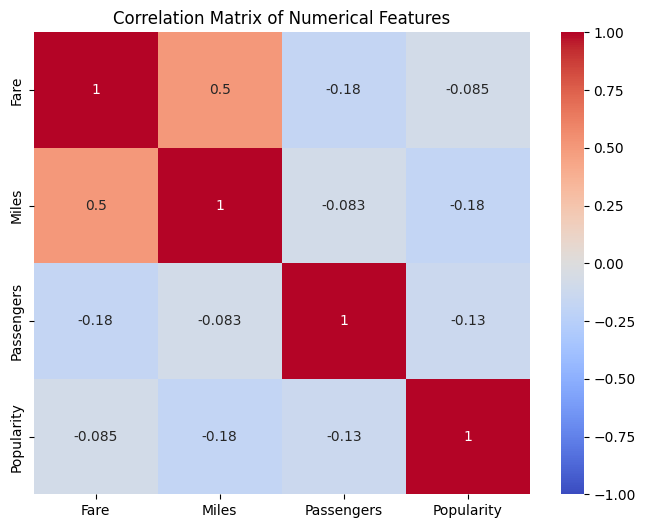

In [22]:
# Heat Map of Numerical Features
quantitative_features = ['Fare', 'Miles', 'Passengers', 'Popularity']
corr_matrix = filtered_flights[quantitative_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The code generates a heatmap to visualize the correlation matrix of selected numerical features (Fare, Miles, Passengers, and Popularity) in the filtered flights dataset. It calculates pairwise correlation coefficients using .corr() and plots them with Seaborn's heatmap, displaying the values with a color gradient (coolwarm) where red represents positive correlations and blue represents negative ones. The plot shows a moderate positive correlation between "Fare" and "Miles" (0.5) and weak or negligible correlations among other features. This helps identify linear relationships and feature dependencies.

### Section 2 - Modeling

Where we'll make the models, splits, and evaluations

In [10]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib
import warnings

### Preprocessing

Next, we need to preprocess our data. We have nominal categorical variables in the form of "Quarter", "Departure City", and "Arrival City". We want to turn these into one hot vectors so that our models can process them, and avoid any potential issues of passing in the unordered variable directly. We also have various kinds of numeric data. For instance, "Miles" can have magnitude of 1000, whereas popularity has a magnitude of 10. Normalizing these with z scores will allow us to make our model more accurate.

In [11]:
# Imports
import numpy as np
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import joblib
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Simplify categorical features by reducing cardinality
data = filtered_flights.copy()

# Keep top 10 most frequent categories for 'Departure City' and 'Arrival City'
top_departure_cities = data['Departure City'].value_counts().nlargest(10).index
top_arrival_cities = data['Arrival City'].value_counts().nlargest(10).index

# Replace less frequent categories with 'Other'
data['Departure City'] = data['Departure City'].apply(lambda x: x if x in top_departure_cities else 'Other')
data['Arrival City'] = data['Arrival City'].apply(lambda x: x if x in top_arrival_cities else 'Other')

# Define categorical and numerical columns
categorical_cols = ['Quarter', 'Departure City', 'Arrival City']
numerical_cols = ['Year', 'Miles', 'Passengers', 'Popularity']

# # One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical columns
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(data[numerical_cols])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_cols)

# Combine preprocessed features
X = pd.concat([encoded_cats_df, scaled_nums_df], axis=1)
y = data['Fare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Pipelines

Now that we've prepared everything, we can train our models! We'll need to create pipelines which will simplify our workflow and combines our preprocessor and our regressor models. We've chosen to use 3 models in particular. A linear regression will be our benchmark for our other two models. This is because we suspect that our data is nonlinear, which means that a linear regression won't fit too well. We can also expect that if we chose a wrong model, or if it doesn't perform well enough, it will likely be closer to the linear model. For our nonlinear models, we chose a random forest regressor and a k-nearest neighbors. A random forest regressor is robust to handle complex datasets (nonlinear), and predicts continous outputs like our fares. K-nearest neighbors will work locally, meaning that it will look for similarly grouped data and use that as a means to identify it. We think that these models will best perform on our dataset.

Also we will use Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) as our metrics due to the nonlinearity of our dataset. We will also measure $R^2$ because of our suspicions of nonlinearity. $R^2$ is inherently linear due to coming from Pearson's correlation coefficient (r), so similar to using linear regression, it may give us a good comparison for what a poorer performance looks like.

In [13]:
%%time

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("R-squared", r2)

Mean Absolute Error 19.21042998899605
Mean Squared Error 763.6719433854719
R-squared 0.8248605556371787
CPU times: user 1min 1s, sys: 1.08 s, total: 1min 2s
Wall time: 1min 4s


In [14]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                              Feature  Importance
24                                              Miles    0.438090
23                                               Year    0.192813
25                                         Passengers    0.161113
26                                         Popularity    0.070746
4       Departure City_Boston, MA (Metropolitan Area)    0.011538
7                Departure City_Dallas/Fort Worth, TX    0.010389
12                               Departure City_Other    0.010364
11  Departure City_New York City, NY (Metropolitan...    0.009843
1                                          Quarter_Q3    0.009697
2                                          Quarter_Q4    0.009375
0                                          Quarter_Q2    0.009166
21         Arrival City_Tampa, FL (Metropolitan Area)    0.007052
6    Departure City_Cleveland, OH (Metropolitan Area)    0.006909
9   Departure City_Los Angeles, CA (Metropolitan A...    0.006697
22    Arri

### Feature Engineering

In [15]:
# Copy dataset for feature engineering
data_fe = filtered_flights.copy()

# 1. Add interaction terms
data_fe['PassengerMiles'] = data_fe['Miles'] * data_fe['Passengers']

# 2. Transform numerical features to address skewness
data_fe['LogPassengers'] = np.log1p(data_fe['Passengers'])
data_fe['LogMiles'] = np.log1p(data_fe['Miles'])

# 3. Encode cyclical features for "Quarter"
data_fe['Quarter_sin'] = np.sin(2 * np.pi * (data_fe['Quarter'].str.extract('(\d)').astype(int) / 4))
data_fe['Quarter_cos'] = np.cos(2 * np.pi * (data_fe['Quarter'].str.extract('(\d)').astype(int) / 4))

# Drop the original "Passengers", "Miles", and "Quarter" as they are now transformed
data_fe = data_fe.drop(columns=['Passengers', 'Miles', 'Quarter'])

# Keep top 10 most frequent categories for 'Departure City' and 'Arrival City'
top_departure_cities = data_fe['Departure City'].value_counts().nlargest(10).index
top_arrival_cities = data_fe['Arrival City'].value_counts().nlargest(10).index

# Replace less frequent categories with 'Other'
data['Departure City'] = data_fe['Departure City'].apply(lambda x: x if x in top_departure_cities else 'Other')
data['Arrival City'] = data_fe['Arrival City'].apply(lambda x: x if x in top_arrival_cities else 'Other')

# Define categorical and numerical columns
categorical_cols = ['Departure City', 'Arrival City']
numerical_cols = ['Year', 'Popularity', 'PassengerMiles', 'LogPassengers', 'LogMiles', 'Quarter_sin', 'Quarter_cos']

# # One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(data_fe[categorical_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Standardize numerical columns
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(data_fe[numerical_cols])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_cols)

# Combine preprocessed features
X = pd.concat([encoded_cats_df, scaled_nums_df], axis=1)
y = data_fe['Fare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
%%time

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("R-squared", r2)

Mean Absolute Error 18.518190551484278
Mean Squared Error 713.336338443753
R-squared 0.8364044521460351
CPU times: user 2min 36s, sys: 1.36 s, total: 2min 37s
Wall time: 2min 39s


### Hyperparameter tuning

As expected, our linear regressor appears to be performing the worst among our 3 models, while our random forest is doing the best. This is is only with one set of hyperparameters though. Let's do some fine tuning to see if we can improve our performance! Linear regression models aren't highly tunable, so we'll be finding the best hyperparameters for our RandomForestRegressor and KneighborsRegressor. Tuning both of these takes around 8 hours, so we went ahead and saved the models to a file for easy retrival.

In [ ]:
%%time

# Refined hyperparameter search space
param_dist = {
    'n_estimators': randint(150, 250),  # 50-150 trees
    'max_depth': [randint(5, 10), None], # Depth range between 5 and 10
    'min_samples_split': randint(2, 5),  # Split range
    'min_samples_leaf': randint(1, 5),   # Leaf range
    'max_features': ['auto', 'sqrt'],    # Auto and sqrt options
    'bootstrap': [True, False]           # Bootstrap or not
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Run RandomizedSearchCV with a reduced n_iter (number of trials)
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist,  
    n_iter=10,  # Reduced to 10 for faster results
    cv=5,       # 5-fold cross-validation
    verbose=2,  
    random_state=42,
    n_jobs=-1
)

# Train with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)

# Use the best model
best_rf_model = random_search.best_estimator_

# Evaluate model
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Final Model

To be continued...

# Ethics & Privacy

The data utilized in this analysis originates from Kaggle, an open-source platform. As such, we have the authorization to use this dataset, and there are no privacy concerns, given that the dataset consists of publicly accessible information about U.S. airline routes and fares. Importantly, this dataset only contains publicly accessible information about the flight route details, dates, and ticket prices without any personal passenger data, ensuring privacy compliance.

This dataset spans from 1993 to 2024. However, data from earlier years may be less reliable due to changes in record-keeping standards and potential inaccuracies in fare estimates from the 1990s Therefore, while analyzing historical trends, we will account for these limitations to ensure the robustness of our findings.

Additionally, we also recognize that this dataset may reflect historical biases inherent within the U.S. airline industry, such as changes in fare structures, evolving market competition, and economic changes that have affected pricing over the years. To address potential biases in our analysis, we will consider separating data by time periods and comparing factors like route frequency and fare trends within comparable economic contexts to ensure fairness in our conclusions.

Our analysis is intended to identify general patterns in airline routes and fares, with the goal of enhancing consumer insights into booking strategies. It is not meant to influence airline policy or operational decisions directly. However, if insights from this research indicate fare disparities or highlight certain routes as more profitable, this could inadvertently impact decisions in pricing strategies or route availability. We emphasize that any insights derived from this research are purely for analytical purposes only and should not be interpreted as recommendations to justify fare structures that could disadvantage particular routes or regions.